<a href="https://colab.research.google.com/github/wrodemoyer/Adult-Income/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income

## Overview

- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

## Imports

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from imblearn.pipeline import make_pipeline as imblearn_pipe
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score


## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [112]:
df= pd.read_csv('/content/drive/MyDrive/Data/adult.csv')

### .head( )

In [113]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### .info( )

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### .shape

In [115]:
df.shape

(48842, 15)

- We have 48842 rows, and 15 columns.

## Clean the Data

### Remove Unnecessary Rows

#### Duplicates

In [116]:
df.duplicated().sum()

52

- We have 52 duplicates.

In [117]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

- There are now zero duplicates.

#### Missing Values

In [118]:
# Display Total Number of Missing Values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


- We dont need to address this. There are no missing values.

In [119]:
# Checking Data Types
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [120]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

### Numeric Columns

In [121]:
# Check for Any Impossible Values in Numeric Column(s)
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- No issues noted.

### Categorical Columns

In [122]:
# Check for Any Inconsistent Values in Categorical Columns
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


#### 'income' column

In [123]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

- I am going to change the column 'income' to 'income > 50K'
  - 1 will equal the result ' >50K '
  - 0 will equal the result ' <=50K '

In [124]:
df['income > 50K'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [125]:
df.drop(columns= ['income'], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income > 50K     48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


- We dropped the 'income' column now that we replaced it with 'income >50K'

#### 'workclass' column

In [126]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [127]:
# Changing the name of the value '?'
df['workclass'].replace('?', 'Unknown', inplace=True)
df['workclass'].value_counts(normalize= True)

Private             0.693995
Self-emp-not-inc    0.079135
Local-gov           0.064275
Unknown             0.057286
State-gov           0.040603
Self-emp-inc        0.034720
Federal-gov         0.029350
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

- '?' Value is now known as 'Unknown'

- We will drop the values 'Without-pay' and 'Never-worked'

In [128]:
df.drop(df[df['workclass'] == 'Without-pay'].index, inplace=True)

df.drop(df[df['workclass'] == 'Never-worked'].index, inplace=True)

df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: workclass, dtype: int64

- We have now dropped the values of 'Without-pay' and 'Never-worked'

In [129]:
df['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Government', inplace= True)
df['workclass'].value_counts()

Private             33860
Government           6549
Self-emp-not-inc     3861
Unknown              2795
Self-emp-inc         1694
Name: workclass, dtype: int64

- We combined local, state and, federal values and named it 'Government' to make our work later on easier.

#### 'education' column

In [130]:
df['education'].value_counts(normalize= True)

HS-grad         0.323099
Some-college    0.222687
Bachelors       0.164339
Masters         0.054472
Assoc-voc       0.042249
11th            0.037101
Assoc-acdm      0.032794
10th            0.028446
7th-8th         0.019504
Prof-school     0.017105
9th             0.015505
12th            0.013433
Doctorate       0.012182
5th-6th         0.010398
1st-4th         0.005025
Preschool       0.001661
Name: education, dtype: float64

- We are going to group some these values together.
  - 9th, 10th, 11th, & 12th will be grouped into 'HighSchool'
  - 'Preschool', '1st-4th', '5th-6th', '7th-8th' will grouped into 'Pre-HighSchool'
  - 'HS-grad', 'Some-college', 'Prof-school' will be grouped into 'Post HighSchool'
  - 'Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm', 'Doctorate' will be grouped into 'College Graduate'

In [131]:
# Highschool
df['education'].replace(['9th', '10th', '11th', '12th'], 'Highschool', inplace=True)

# Pre Highschool
df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th'], 'Pre Highschool', inplace=True)

# Post Highschool
df['education'].replace(['HS-grad', 'Some-college', 'Prof-school'], 'Post Highschool', inplace=True)

# College Grad
df['education'].replace(['Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm', 'Doctorate'], 'College Graduate', inplace=True)

df['education'].value_counts()

Post Highschool     27446
College Graduate    14922
Highschool           4607
Pre Highschool       1784
Name: education, dtype: int64

- Now we condensed our values from 16 values, to 4.

#### 'marital-status' column

In [132]:
df['marital-status'].value_counts()

Married-civ-spouse       22352
Never-married            16069
Divorced                  6629
Separated                 1530
Widowed                   1517
Married-spouse-absent      625
Married-AF-spouse           37
Name: marital-status, dtype: int64

- We will group the 3 married values into one single married value.

In [133]:
# Married
df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married', inplace=True)

df['marital-status'].value_counts(normalize=True)

Married          0.471995
Never-married    0.329560
Divorced         0.135954
Separated        0.031379
Widowed          0.031112
Name: marital-status, dtype: float64

- All values have been grouped properly.

#### 'occupation' column

In [134]:
df['occupation'].value_counts(normalize=True)

Prof-specialty       0.126438
Craft-repair         0.125126
Exec-managerial      0.124715
Adm-clerical         0.114912
Sales                0.112800
Other-service        0.100843
Machine-op-inspct    0.061835
?                    0.057323
Transport-moving     0.048278
Handlers-cleaners    0.042433
Farming-fishing      0.030292
Tech-support         0.029636
Protective-serv      0.020140
Priv-house-serv      0.004922
Armed-Forces         0.000308
Name: occupation, dtype: float64

In [135]:
# Changing the name of the value '?'
df['occupation'].replace('?', 'Unknown', inplace=True)
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6101
Exec-managerial      6081
Adm-clerical         5603
Sales                5500
Other-service        4917
Machine-op-inspct    3015
Unknown              2795
Transport-moving     2354
Handlers-cleaners    2069
Farming-fishing      1477
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

- '?' Value is now known as 'Unknown'

#### 'race' column

In [136]:
df['race'].value_counts()

White                 41688
Black                  4679
Asian-Pac-Islander     1516
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

- No issues noted

#### 'native-country' column

In [137]:
df['native-country'].value_counts()

United-States                 43762
Mexico                          943
?                               856
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [138]:
df['native-country'].replace('?', 'Unknown', inplace=True)

- We change the value '?' to 'Unknown'

In [139]:
# Changing native country to continents
df['native-country'].replace(['United-States', 'Mexico', 'Puerto-Rico', 'Canada', 'Cuba', 'Trinadad&Tobago',
                              'Jamaica', 'El-Salvador', 'Nicaragua', 'Guatemala', 'Honduras', 'Outlying-US(Guam-USVI-etc)',
                              'Dominican-Republic', 'Haiti'], 'North America', inplace=True)


In [140]:
df['native-country'].replace(['Philippines', 'China', 'India', 'South', 'Japan', 'Vietnam', 'Taiwan', 'Hong',
                              'Thailand', 'Cambodia', 'Laos', 'Iran'], 'Asia', inplace= True)

In [141]:
df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Greece', 'France', 'Ireland', 'Yugoslavia',
                              'Scotland', 'Hungary', 'Holand-Netherlands', 'Portugal'], 'Europe', inplace= True)

In [142]:
df['native-country'].replace(['Columbia', 'Peru', 'Ecuador'], 'South America', inplace= True)

In [143]:
df['Continent'] = df['native-country']
df.drop(columns= ['native-country'], inplace= True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income > 50K,Continent
0,25,Private,226802,Highschool,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,North America
1,38,Private,89814,Post Highschool,9,Married,Farming-fishing,Husband,White,Male,0,0,50,0,North America
2,28,Government,336951,College Graduate,12,Married,Protective-serv,Husband,White,Male,0,0,40,1,North America
3,44,Private,160323,Post Highschool,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,North America
4,18,Unknown,103497,Post Highschool,10,Never-married,Unknown,Own-child,White,Female,0,0,30,0,North America


In [144]:
df.shape

(48759, 15)

In [145]:
df['Continent'].value_counts()

North America    45853
Asia              1094
Unknown            856
Europe             780
South America      176
Name: Continent, dtype: int64

- We sorted each Country into their respected Continents.
  - This will help keep our data more organized.

## Exploratory Data Analysis

### Univariates

#### Categorical Features

##### Countplots

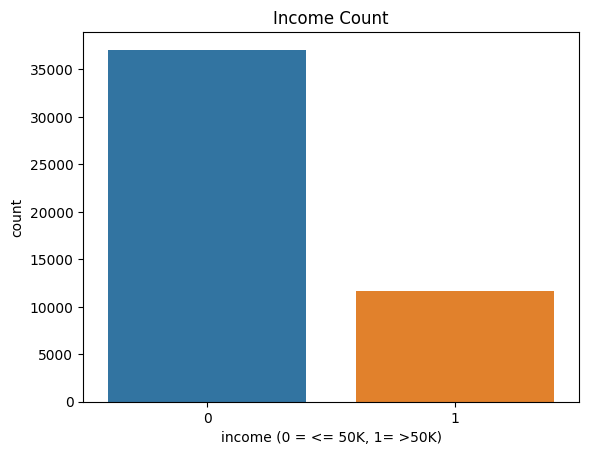

In [146]:
# Using a CountPlot to look at our Target ('income')
ax= sns.countplot(data= df, x = 'income > 50K')

ax.set_title('Income Count')
ax.set_xlabel('income (0 = <= 50K, 1= >50K)');

- Significantly more people have an income of <=50K than >50K.

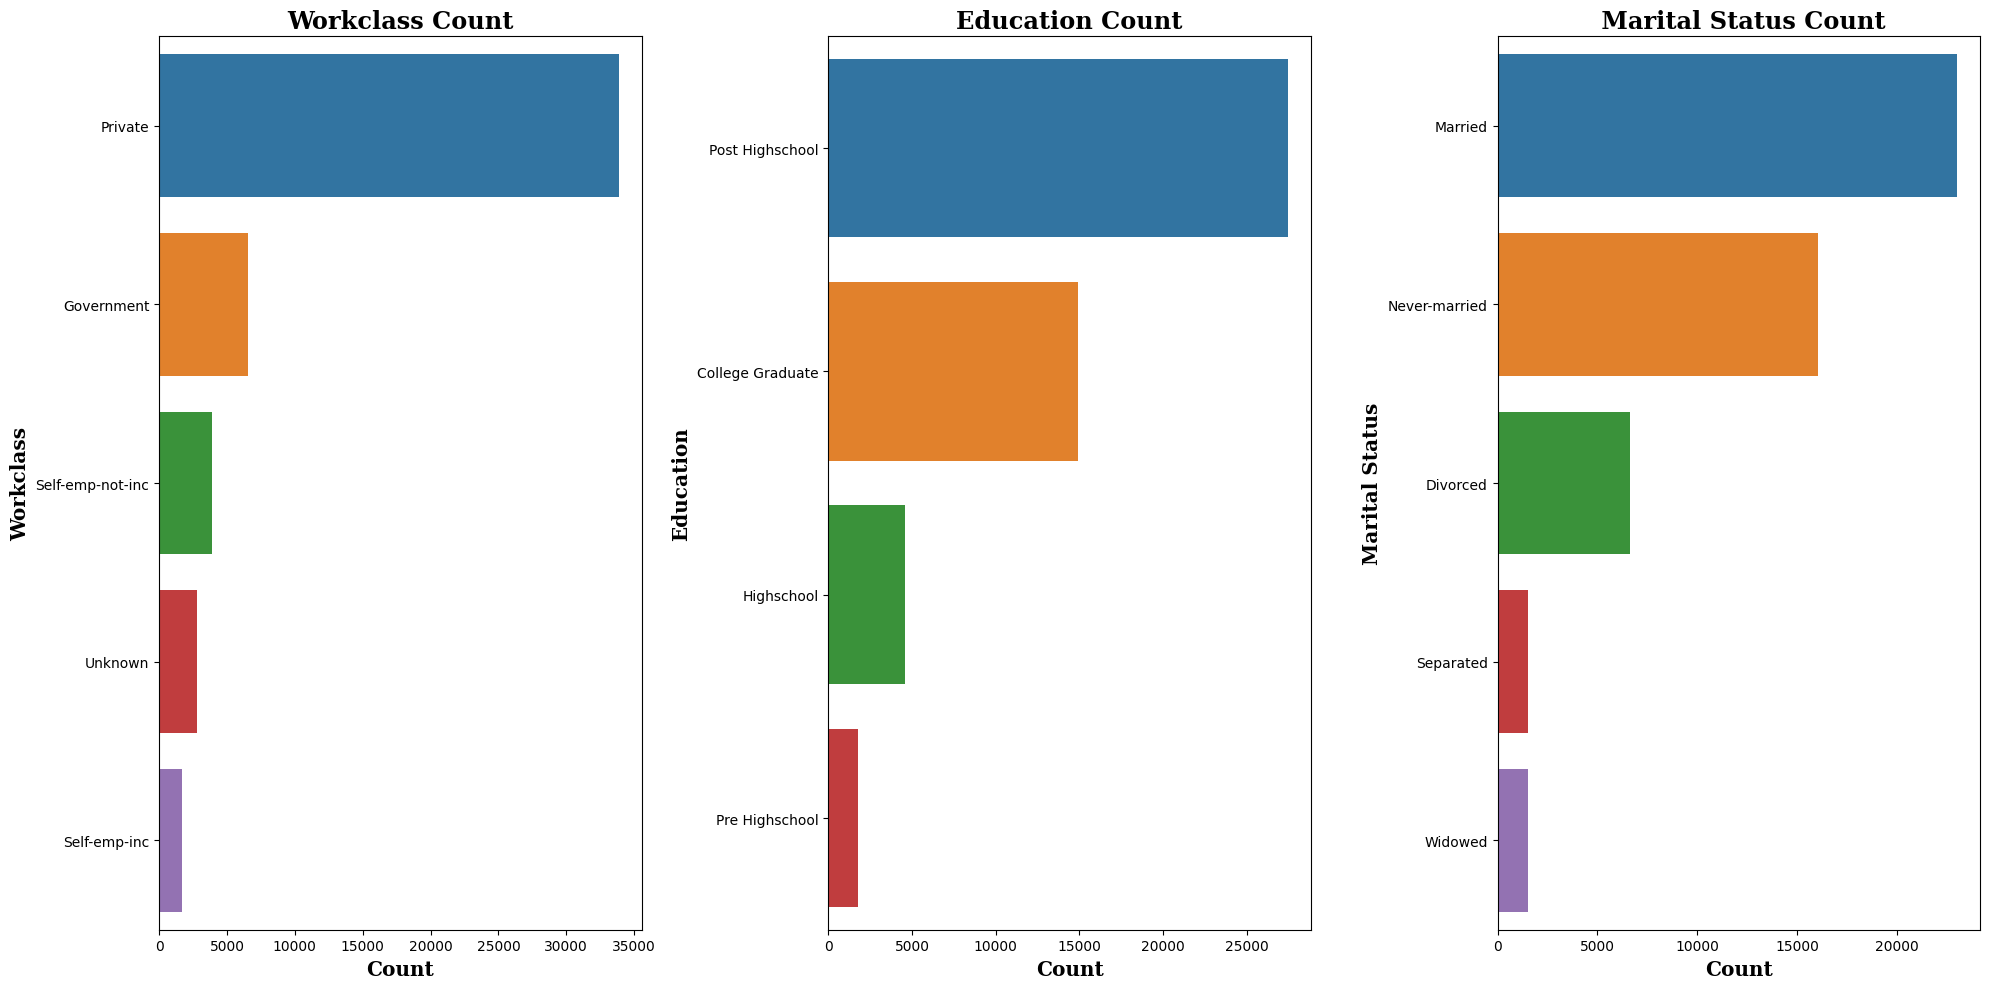

In [147]:
fig, axes = plt.subplots(ncols= 3, figsize= (20,10))
# workclass
axes[0]= sns.countplot(data=df, y= 'workclass', order= df['workclass'].value_counts().index, ax= axes[0])

axes[0].set_title('Workclass Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Workclass',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# education
axes[1]= sns.countplot(data=df, y= 'education', order= df['education'].value_counts().index, ax= axes[1])

axes[1].set_title('Education Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Education',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


# martial status
axes[2]= sns.countplot(data=df, y= 'marital-status',order= df['marital-status'].value_counts().index, ax= axes[2])

axes[2].set_title(' Marital Status Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[2].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[2].set_ylabel('Marital Status',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


plt.tight_layout();

- Workclass:
  - The value of 'Private' is by far the most dominant value in the workplace column.
- Education:
  - There is a fairly significant drop off after 'Post Highschool'.
- Marital Status
  - Its pretty clear that 'Married' and 'Never-married' are the most common values in the marital status column.

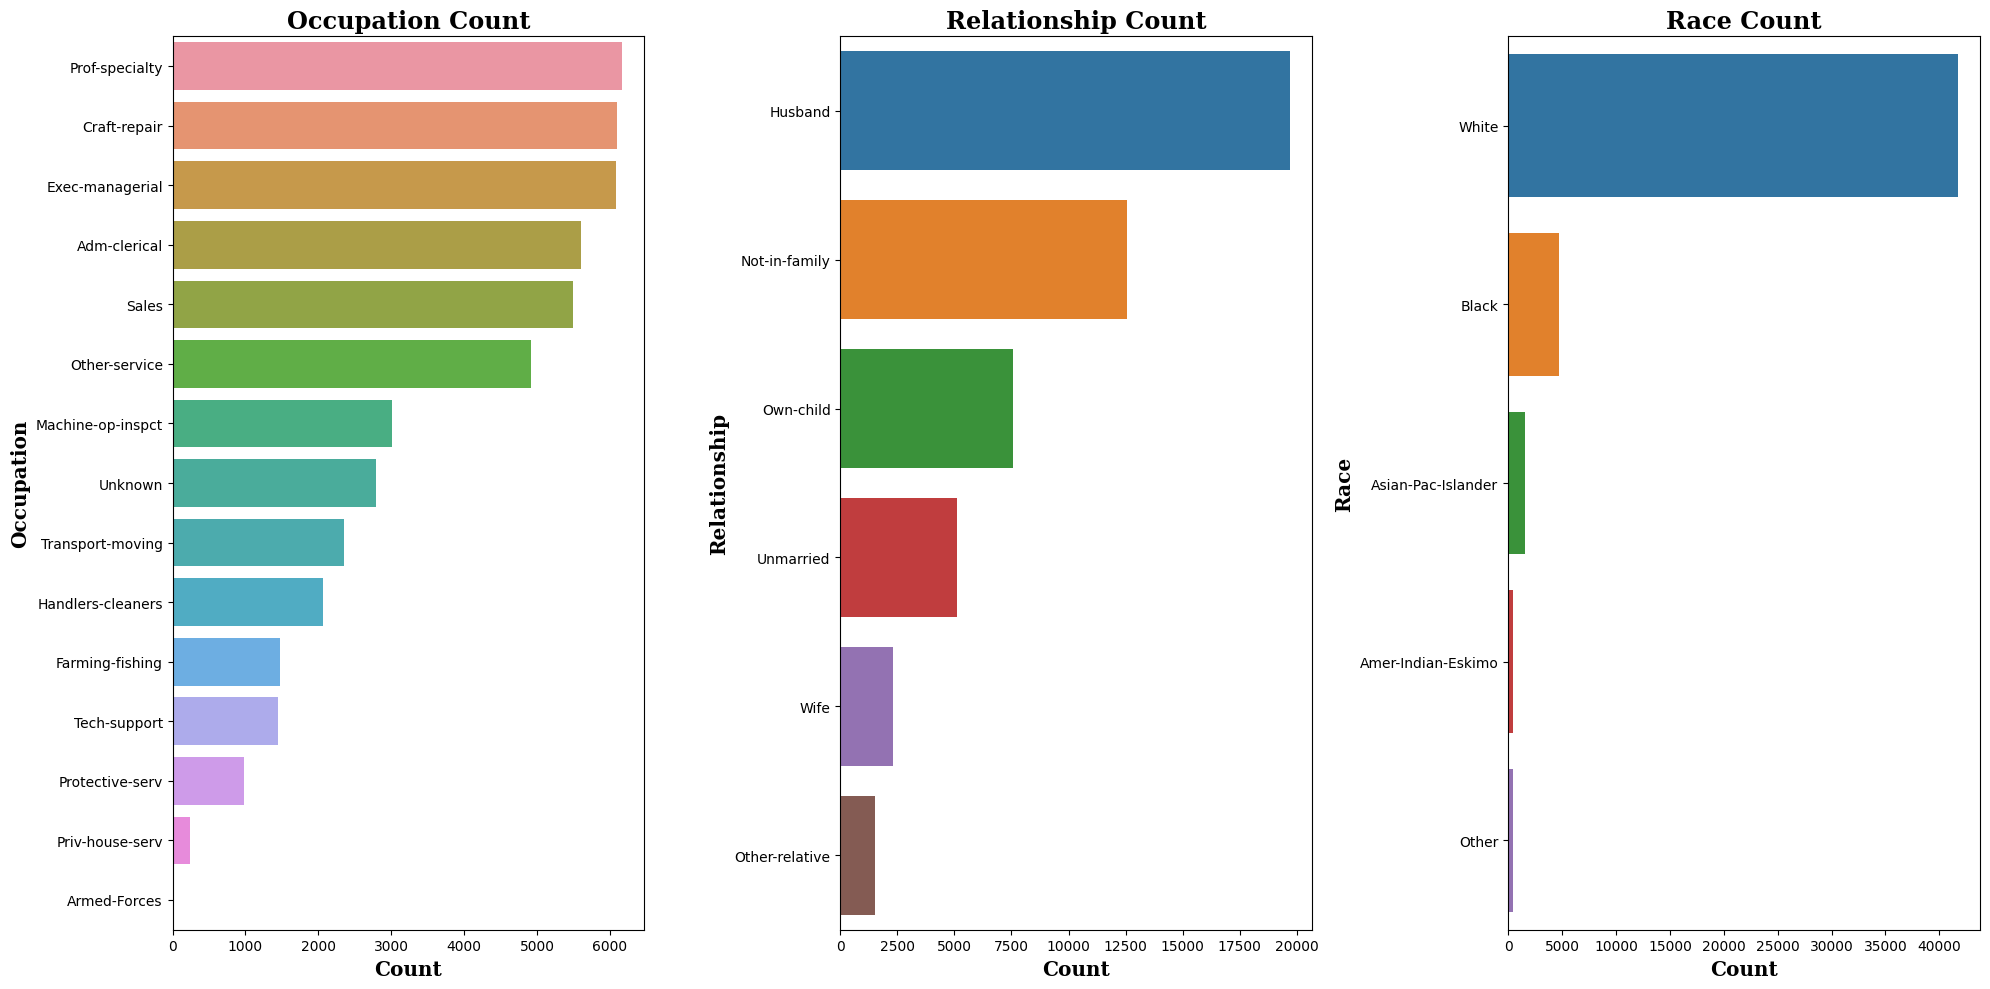

In [148]:
fig, axes = plt.subplots(ncols= 3, figsize= (20,10))
# occupation
axes[0]= sns.countplot(data=df, y= 'occupation', order= df['occupation'].value_counts().index, ax= axes[0])

axes[0].set_title('Occupation Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Occupation',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# relationship
axes[1]= sns.countplot(data=df, y= 'relationship', order= df['relationship'].value_counts().index, ax= axes[1])

axes[1].set_title('Relationship Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Relationship',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


# race
axes[2]= sns.countplot(data=df, y= 'race',order= df['race'].value_counts().index, ax= axes[2])

axes[2].set_title('Race Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[2].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[2].set_ylabel('Race',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')


plt.tight_layout();

- Occupation
  - Compared to other columns, occupation is much more diverse. Value 'Prof-specialty' just edges 'Craft-repair' as the highest occupation value.
- Relationship
  - Husband is clearly the most common value.
- Race
  - The value 'White' dominates the 'Race' column.

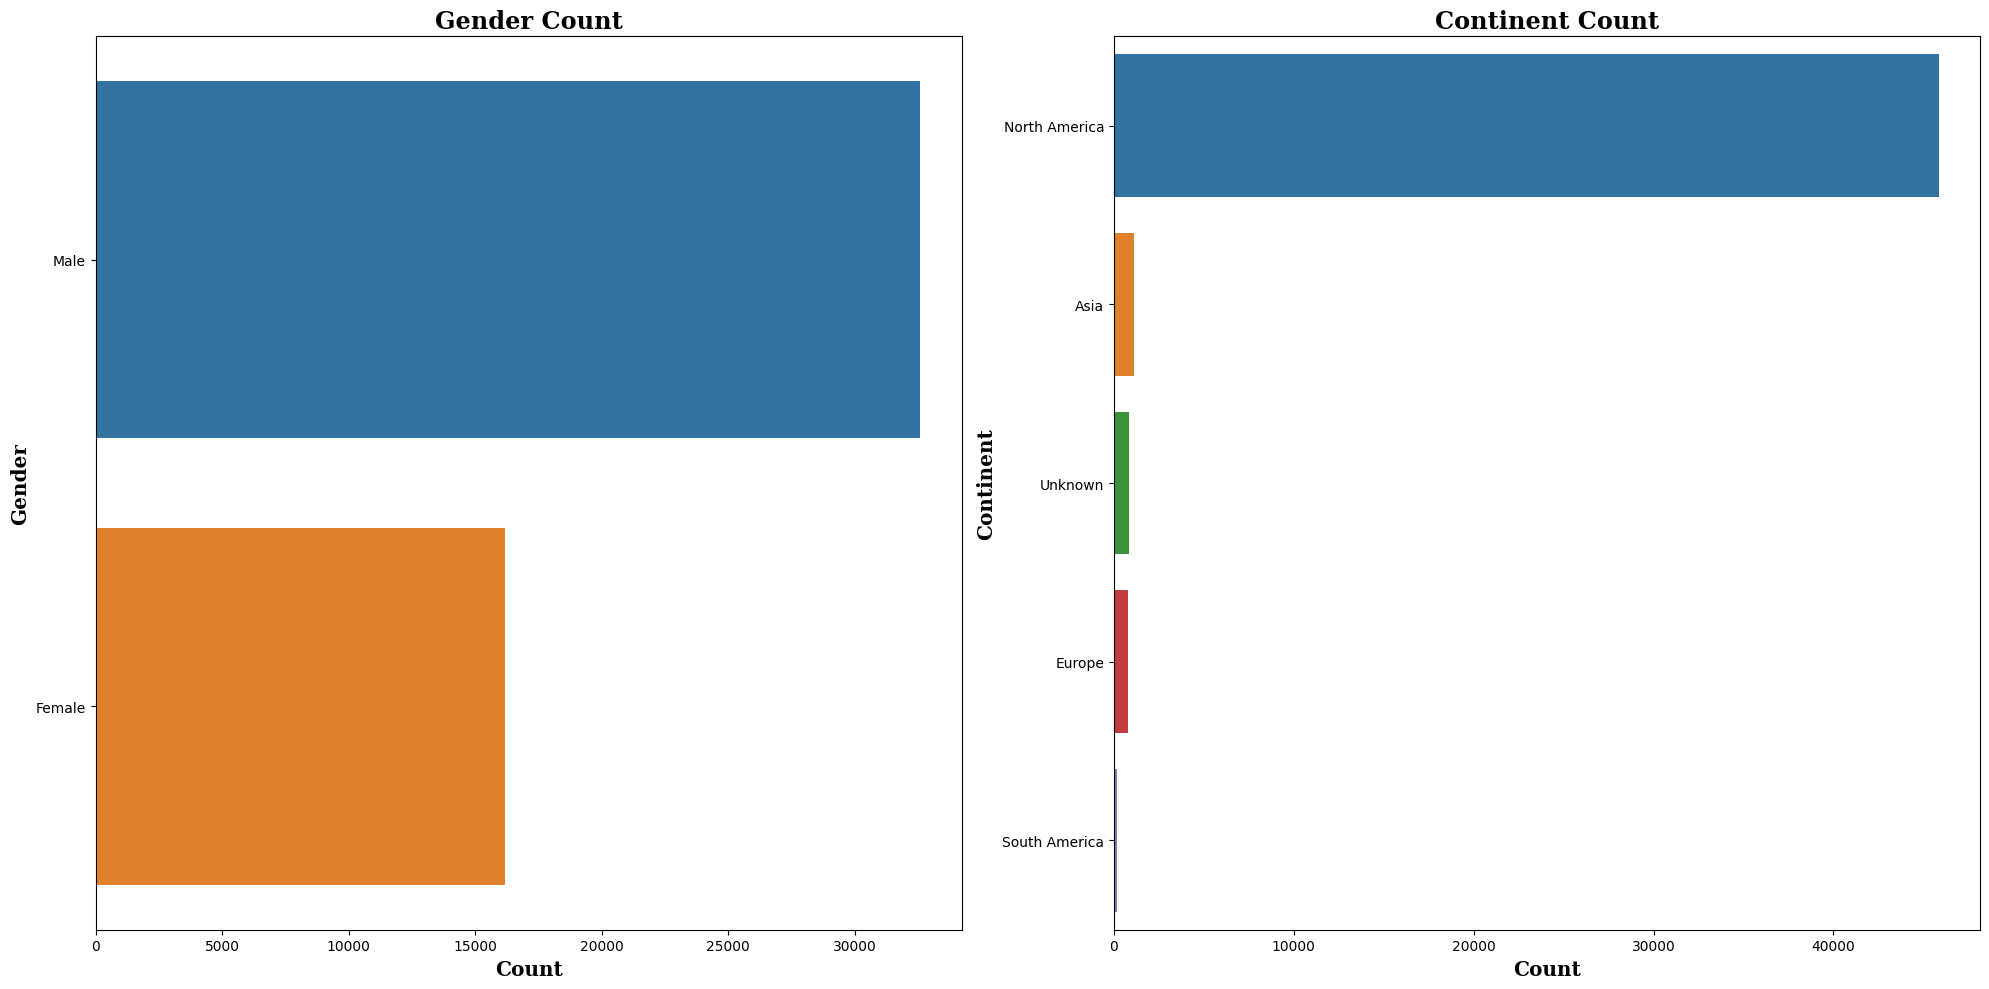

In [149]:
fig, axes = plt.subplots(ncols= 2, figsize= (20,10))
# gender
axes[0]= sns.countplot(data=df, y= 'gender', order= df['gender'].value_counts().index, ax= axes[0])

axes[0].set_title('Gender Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[0].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[0].set_ylabel('Gender',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')



# Continent
axes[1]= sns.countplot(data=df, y= 'Continent', order= df['Continent'].value_counts().index, ax= axes[1])

axes[1].set_title('Continent Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

axes[1].set_xlabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

axes[1].set_ylabel('Continent',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

plt.tight_layout();

- Gender
  - Male looks to double the value of Female.
- Continent
  - North America clearly dominates the Continent column.

#### Numeric Features

In [150]:
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income > 50K
count,48759.000000,4.875900e+04,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000
mean,38.652926,1.896732e+05,10.079821,1080.764392,87.612564,40.431038,0.239525
std,13.702903,1.056251e+05,2.570070,7458.211458,403.249103,12.388918,0.426798
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175355e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376270e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


##### Histograms

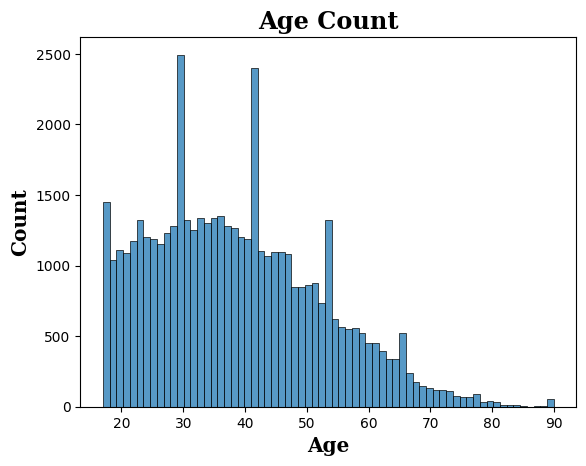

In [151]:
# age
ax= sns.histplot(data=df, x= 'age',)

ax.set_title('Age Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

ax.set_xlabel('Age',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

ax.set_ylabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold');


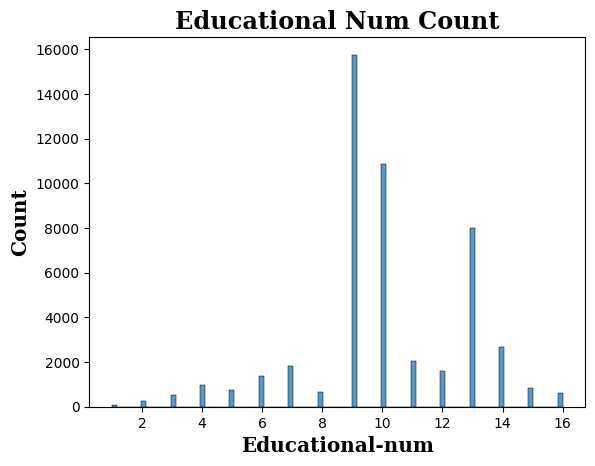

In [152]:
# educational num
ax= sns.histplot(data=df, x= 'educational-num',)

ax.set_title('Educational Num Count',
                  fontfamily='serif',
                  fontsize='xx-large',
                  fontweight='semibold')

ax.set_xlabel('Educational-num',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold')

ax.set_ylabel('Count',
                   fontfamily= 'serif',
                   fontsize= 'x-large',
                   fontweight= 'bold');


##### Boxplots

Text(0.5, 1.0, 'FNLWGT')

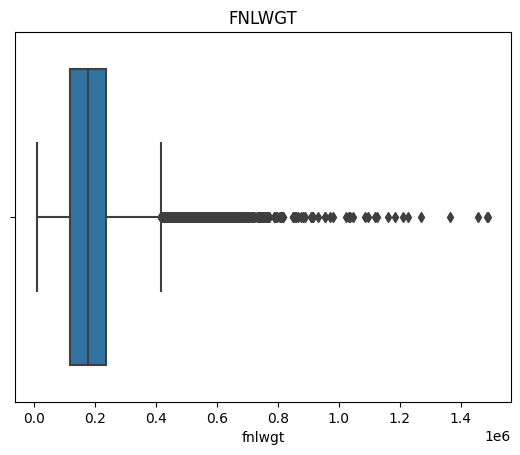

In [153]:
# fnlwgt
ax = sns.boxplot(data = df,
                 x = 'fnlwgt')
ax.set_title('FNLWGT')

- fnlwgt column has quite a few outliers.

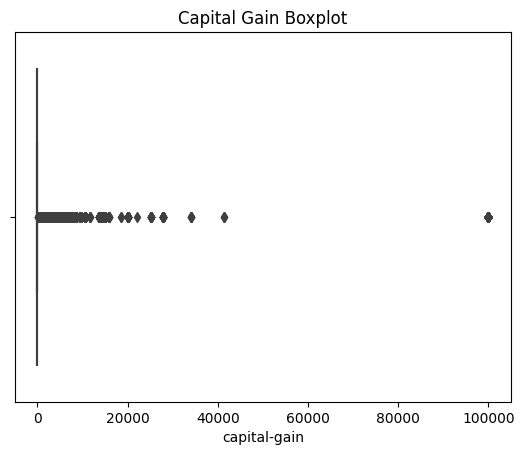

In [154]:
# capital-gain
ax= sns.boxplot(data=df,
                x= 'capital-gain')

ax.set_title('Capital Gain Boxplot');

- We have a very noticable outlier just under 100,000.

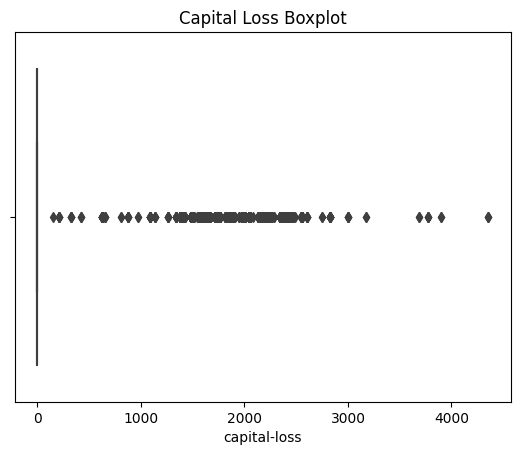

In [155]:
# capital-loss
ax= sns.boxplot(data=df,
                x= 'capital-loss')

ax.set_title('Capital Loss Boxplot');

- Similar looking the capital-gain. Most values sit at 0 with some outliers.

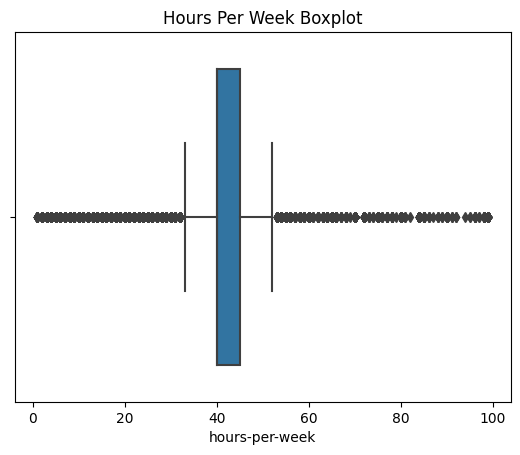

In [156]:
# hours-per-week
ax= sns.boxplot(data=df,
                x= 'hours-per-week')

ax.set_title('Hours Per Week Boxplot');

- Most values are around 40 hours per week.

### Multivariates

#### Heatmap

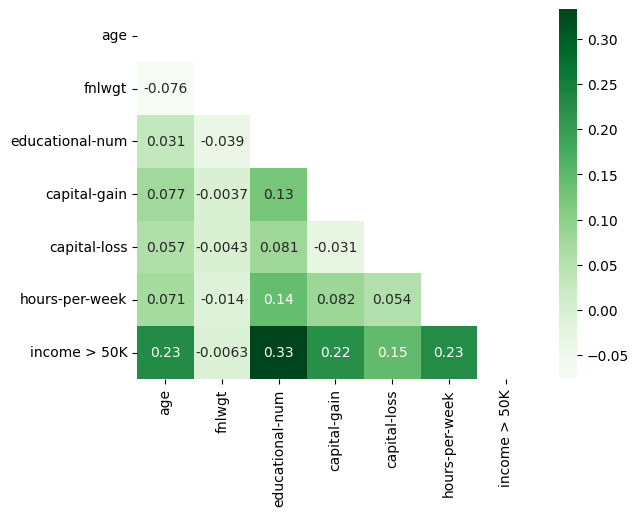

In [157]:
# Looking at the correlation between our columns
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap= 'Greens', annot= True, mask= mask);

- We have various correlations between some of our features.

- Strong Correlations
  - Positive Correlations
    - Our strongest overall correlation is between 'hours-per-week' and 'educational-num' with a 0.14.
    - 'capital-gain' and 'educational-num' also have a very strong correlation with 0.13.
  - Negative Correlations
    - We have a -0.076 correlation between 'fnlwgt' and 'age'.

- Moderate Correlations

  *   'hours-per-week' and 'fnlwgt'
  *   'hours-per-week' and 'capital-loss-



#### Regplots

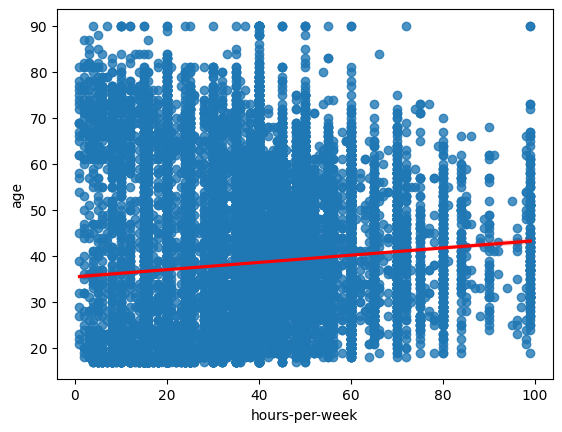

In [158]:
# Looking at the Relationship between hours per week and age.
ax = sns.regplot(data= df, x= 'hours-per-week', y= 'age', line_kws={'color': 'red'});

- We have a positive correlation here, between hours per week and age.
- On average, individuals who are older slightly work more hours per week.

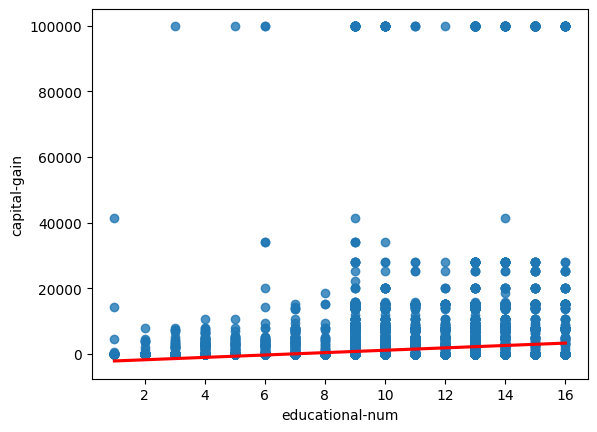

In [159]:
# Looking at educational num and capital gains relationship.

ax= sns.regplot(data=df, x= 'educational-num', y= 'capital-gain', line_kws= {'color': 'red'});

- We have a postisive relationship between our 2 features.
- On average, higher the education, higher the capital gain.

#### Barplots

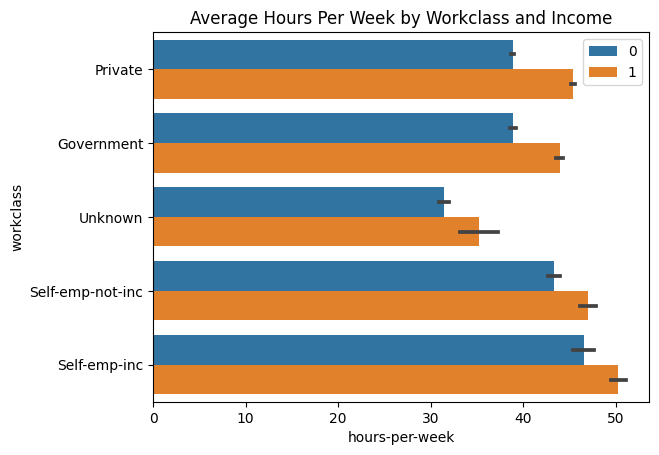

In [160]:
# Comparing workclass and hours per week

ax= sns.barplot(data=df, x= 'hours-per-week', y= 'workclass', hue= 'income > 50K')

# title
ax.set_title('Average Hours Per Week by Workclass and Income')

# legend location
ax.legend(loc= 'best');

### Observations

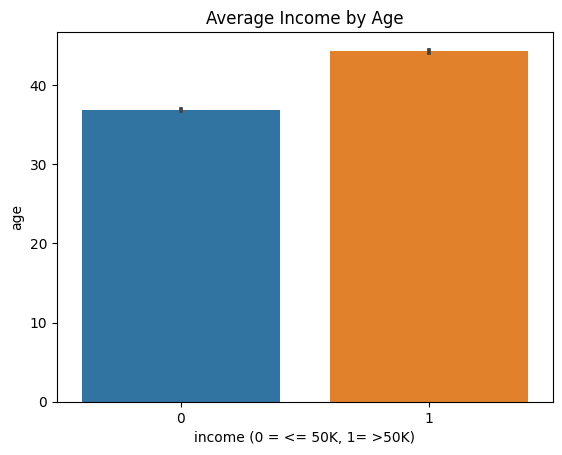

In [161]:
# comparing average income by age
ax= sns.barplot(data=df, x= 'income > 50K', y= 'age')

# title
ax.set_title('Average Income by Age')
ax.set_xlabel('income (0 = <= 50K, 1= >50K)');

- Of the individuals who make greater than 50k, are clearly older in age on average.

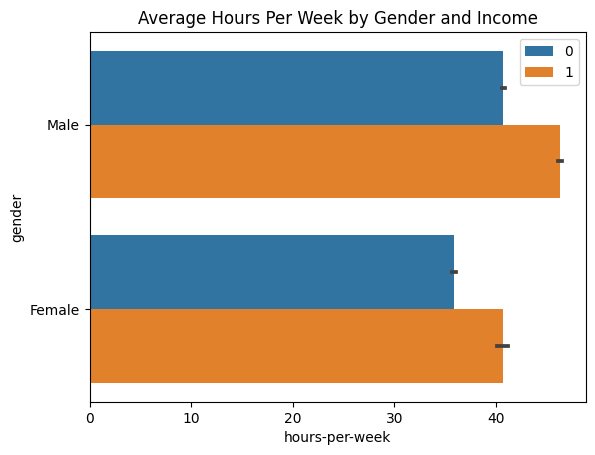

In [162]:

ax= sns.barplot(data=df, x= 'hours-per-week', y= 'gender', hue= 'income > 50K')

# title
ax.set_title('Average Hours Per Week by Gender and Income')

# legend location
ax.legend(loc= 'best');

- Both Genders who make more than 50k, work more hours per week than those who make 50k or less.

- On average, males work more hours per week compared to females when comparing their respectable income categories.

## Machine Learning

In [163]:
def eval_classification(true, pred, name='Model'):

    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred))
    ConfusionMatrixDisplay.from_predictions(true, pred)
    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

In [164]:
df['income > 50K'].value_counts(normalize=True)

0    0.760475
1    0.239525
Name: income > 50K, dtype: float64

In [165]:
# Define our Features(X) and Target(y)
X= df.drop(columns= ['income > 50K'])
y= df['income > 50K']


In [166]:
# Scaler
scaler = StandardScaler()

ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')

# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [167]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

### Models

#### Base Model

In [169]:
base_processor = make_column_transformer((ohe, cat_selector), (scaler, num_selector), remainder= 'drop')

base_processor.fit(X_train, y_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])

In [170]:
X_train_base_proc= base_processor.transform(X_train)
X_test_base_proc= base_processor.transform(X_test)

In [171]:
X_train_base_proc.shape

(36569, 53)

#### Logistic Regression Model

In [175]:
# Create Model for a Base Logistic Regression
logreg= LogisticRegression()
log_pipe= make_pipeline(base_processor, logreg)

log_pipe.fit(X_train, y_train)

train_pred= log_pipe.predict(X_train)
test_pred= log_pipe.predict(X_test)

LR BaseTrain 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     27786
           1       0.74      0.60      0.66      8783

    accuracy                           0.85     36569
   macro avg       0.81      0.77      0.78     36569
weighted avg       0.85      0.85      0.85     36569



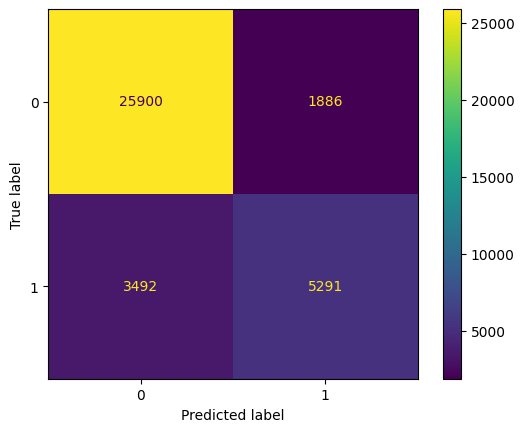

LR BaseTest 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9294
           1       0.73      0.61      0.66      2896

    accuracy                           0.85     12190
   macro avg       0.81      0.77      0.78     12190
weighted avg       0.85      0.85      0.85     12190



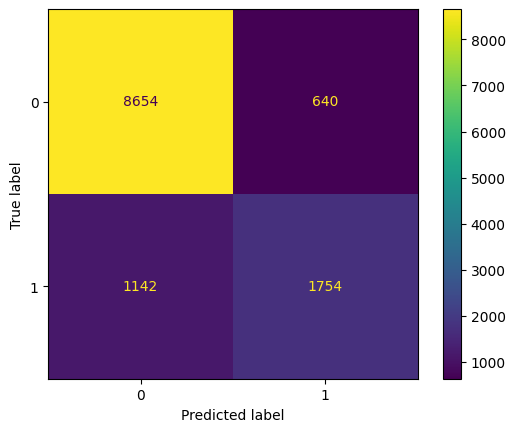

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815


In [176]:
train_scores= eval_classification(y_train, train_pred, name= 'LR BaseTrain')

test_scores= eval_classification(y_test, test_pred, name= 'LR BaseTest')

scores= pd.concat([train_scores, test_scores])
scores

##### Tuning Hyperparameters

- We will tune the Hyperparameters to see if we can create a more accurate model.

In [177]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [178]:
logreg_paramgrid= {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'logisticregression__class_weight': ['balanced'],
                   'logisticregression__solver': ['liblinear']}

In [179]:
logreg_grid = GridSearchCV(log_pipe, logreg_paramgrid)
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['liblinear']})

In [180]:
logreg_grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__solver': 'liblinear'}

In [181]:
best_logreg= logreg_grid.best_estimator_

In [182]:
best_logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2be3e06c50>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2be39838b0>)])),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced',
                                    solver='liblinear'))])

In [183]:
best_lr_train_pred= best_logreg.predict(X_train)
best_lr_test_pred= best_logreg.predict(X_test)

##### Tuned Model

LR Tuned Train 

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     27786
           1       0.57      0.84      0.68      8783

    accuracy                           0.81     36569
   macro avg       0.76      0.82      0.77     36569
weighted avg       0.85      0.81      0.82     36569



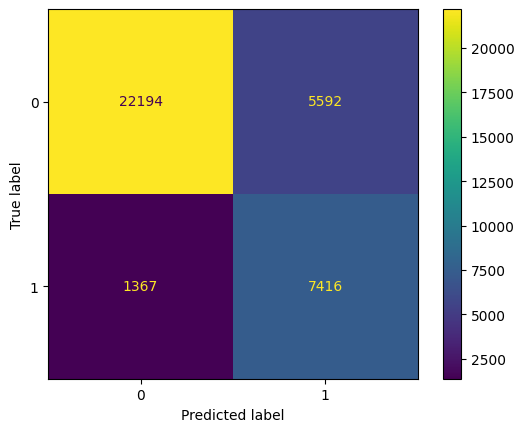

LR Tuned Test 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9294
           1       0.56      0.86      0.68      2896

    accuracy                           0.81     12190
   macro avg       0.75      0.82      0.77     12190
weighted avg       0.85      0.81      0.82     12190



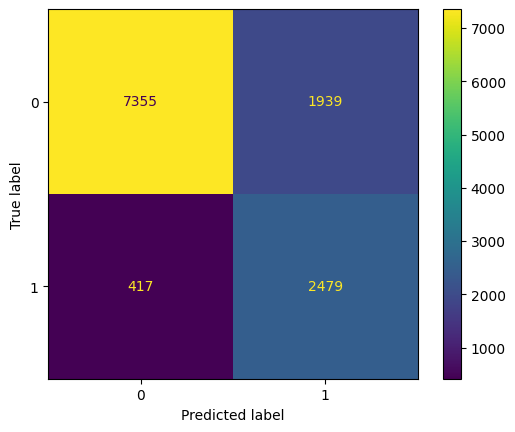

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727


In [184]:
tuned_lr_train_scores= eval_classification(y_train, best_lr_train_pred, name= 'LR Tuned Train')
tuned_lr_test_scores= eval_classification(y_test, best_lr_test_pred, name= 'LR Tuned Test')

scores= pd.concat([scores, tuned_lr_train_scores, tuned_lr_test_scores])
scores

- Our Previous Models tested well, but were also very inbalanced.
- We will try the models below to try to make our model accurate and more balance
  - Over Sample
  - Under Sample
  - PCA

#### Logistic Regression Model w/ OverSampling

In [185]:
over_sampler= RandomOverSampler()

In [186]:
# Display the value counts for y_train
print('y_train balance')
display(y_train.value_counts())

X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# Display the value counts for y_train_over
print('\ny_train_under balance')
y_train_over.value_counts()

y_train balance


0    27786
1     8783
Name: income > 50K, dtype: int64


y_train_under balance


0    27786
1    27786
Name: income > 50K, dtype: int64

In [187]:
log_reg_over = LogisticRegression(max_iter=1000)
log_reg_over_pipe = imblearn_pipe(base_processor, over_sampler, log_reg_over)
log_reg_over_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                ('randomoversampler', RandomOverSampler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [188]:
lr_over_train_pred= log_reg_over_pipe.predict(X_train)
lr_over_test_pred= log_reg_over_pipe.predict(X_test)

LR OverSample Train 

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     27786
           1       0.57      0.84      0.68      8783

    accuracy                           0.81     36569
   macro avg       0.76      0.82      0.77     36569
weighted avg       0.85      0.81      0.82     36569



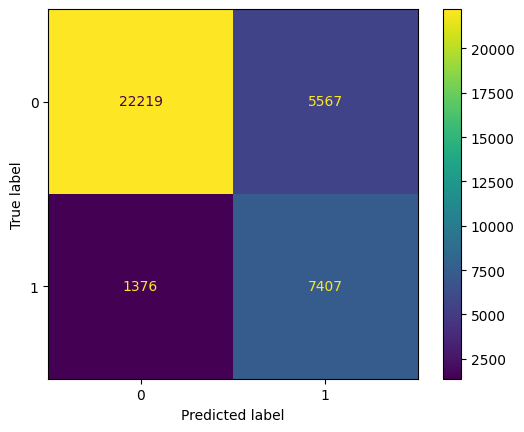

LR OverSample Test 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9294
           1       0.56      0.86      0.68      2896

    accuracy                           0.81     12190
   macro avg       0.76      0.83      0.77     12190
weighted avg       0.86      0.81      0.82     12190



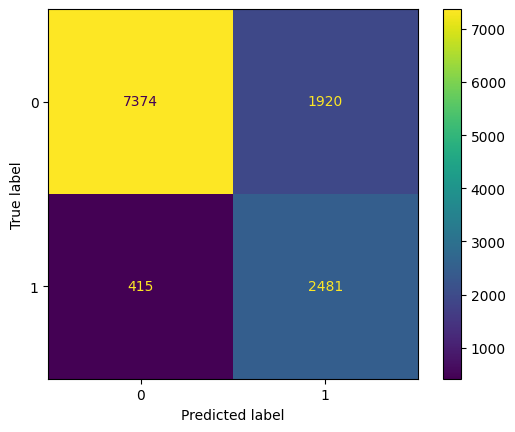

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450


In [189]:
lr_over_train_scores= eval_classification(y_train, lr_over_train_pred, name= 'LR OverSample Train')
lr_over_test_scores= eval_classification(y_test, lr_over_test_pred, name= 'LR OverSample Test')

scores= pd.concat([scores, lr_over_train_scores, lr_over_test_scores])
scores

#### Logistic Regression w/ UnderSampling

In [190]:
under_sampler = RandomUnderSampler()

In [191]:
# Display the value counts for y_train
print('y_train balance')
display(y_train.value_counts())

X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Display the value counts for y_train_undersampled
print('\ny_train_under balance')
y_train_under.value_counts()

y_train balance


0    27786
1     8783
Name: income > 50K, dtype: int64


y_train_under balance


0    8783
1    8783
Name: income > 50K, dtype: int64

In [192]:
log_reg_under = LogisticRegression()
log_reg_under_pipe = imblearn_pipe(base_processor, under_sampler, log_reg_under)
log_reg_under_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                ('randomundersampler', RandomUnderSampler()),
                ('logisticregression', LogisticRegression())])

In [193]:
lr_under_train_pred= log_reg_under_pipe.predict(X_train)
lr_under_test_pred= log_reg_under_pipe.predict(X_test)

LR UnderSample Train 

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     27786
           1       0.57      0.84      0.68      8783

    accuracy                           0.81     36569
   macro avg       0.76      0.82      0.77     36569
weighted avg       0.85      0.81      0.82     36569



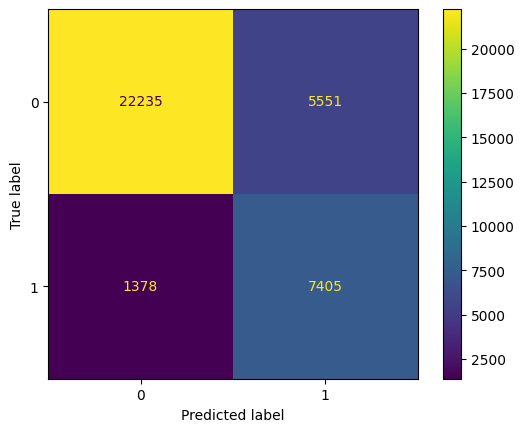

LR UnderSample Test 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9294
           1       0.56      0.86      0.68      2896

    accuracy                           0.81     12190
   macro avg       0.75      0.82      0.77     12190
weighted avg       0.85      0.81      0.82     12190



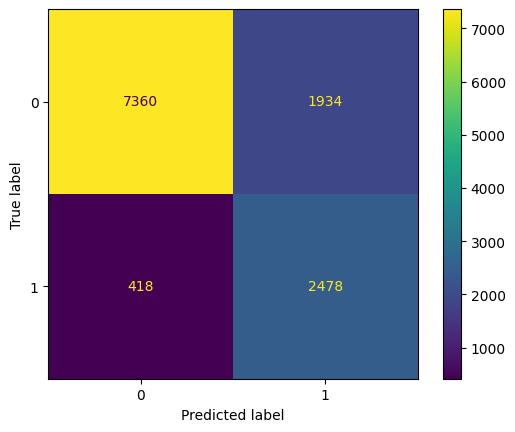

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055


In [194]:
lr_under_train_scores= eval_classification(y_train, lr_under_train_pred, name= 'LR UnderSample Train')
lr_under_test_scores= eval_classification(y_test, lr_under_test_pred, name= 'LR UnderSample Test')

scores= pd.concat([scores, lr_under_train_scores, lr_under_test_scores])
scores

#### Logistic Regression Model w/ PCA

In [168]:
# PCA
pca= PCA(n_components= .95)

In [172]:
pca.fit(X_train_base_proc)

PCA(n_components=0.95)

In [173]:
X_train_pca= pca.transform(X_train_base_proc)

In [174]:
X_test_pca= pca.transform(X_test_base_proc)
X_test_pca.shape

(12190, 24)

In [195]:
lr_pca_pipe= make_pipeline(base_processor, PCA(n_components=.95), logreg)

lr_pca_pipe.fit(X_train, y_train)

pca_lr_train_pred= lr_pca_pipe.predict(X_train)
pca_lr_test_pred= lr_pca_pipe.predict(X_test)


LR PCA Train 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27786
           1       0.73      0.57      0.64      8783

    accuracy                           0.85     36569
   macro avg       0.80      0.75      0.77     36569
weighted avg       0.84      0.85      0.84     36569



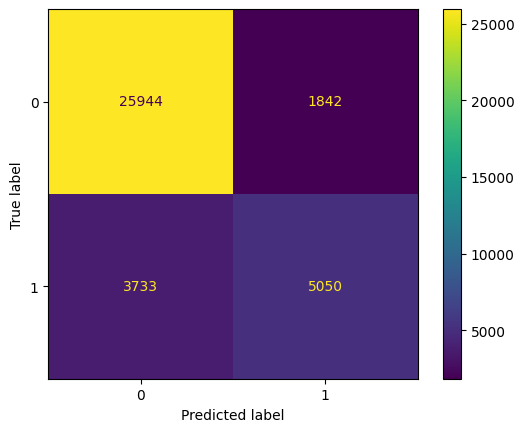

LR PCA Test 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9294
           1       0.73      0.58      0.64      2896

    accuracy                           0.85     12190
   macro avg       0.80      0.76      0.77     12190
weighted avg       0.84      0.85      0.84     12190



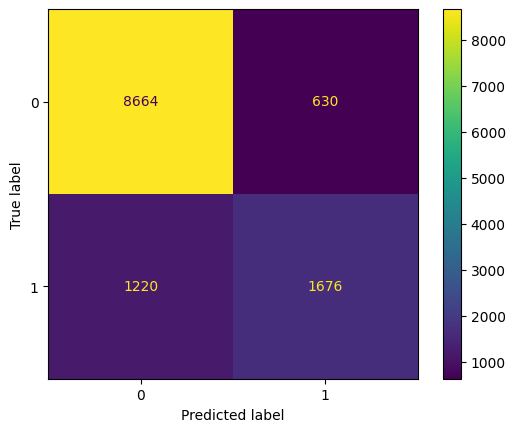

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [196]:
pca_lr_train_scores= eval_classification(y_train, pca_lr_train_pred, name= 'LR PCA Train')
pca_lr_test_scores= eval_classification(y_test, pca_lr_test_pred, name= 'LR PCA Test')

scores= pd.concat([scores, pca_lr_train_scores, pca_lr_test_scores])
scores

##### Observations

- Our base and tuned model are identical.
  - 0.853815 is the accuracy score for our base model
  - 0.853815 is the accuracy score for our tuned model
- Our Over and Under Sampled Models are similar.
  - 0.808450 is the accuracy score for our OverSampled Model
  - 0.807055 is the accuracy score for our UnderSampled Model
- Our PCA Model is similar to our base and tuned models.
  - 0.848236 is the accuracy score of our PCA model

#### KNN Model

In [197]:
# Create our KNN base Model
knn= KNeighborsClassifier()

# Pipeline
knn_pipe= make_pipeline(base_processor, knn)

# Fit Model
knn_pipe.fit(X_train, y_train)

# Predict
knn_train_pred= knn_pipe.predict(X_train)
knn_test_pred= knn_pipe.predict(X_test)

KNN BaseTrain 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     27786
           1       0.79      0.68      0.73      8783

    accuracy                           0.88     36569
   macro avg       0.85      0.81      0.83     36569
weighted avg       0.88      0.88      0.88     36569



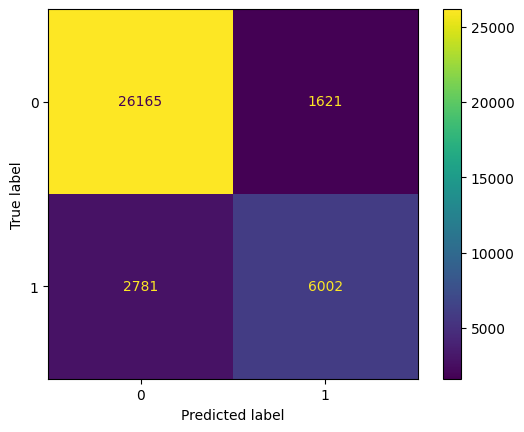

KNN BaseTest 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9294
           1       0.67      0.59      0.63      2896

    accuracy                           0.84     12190
   macro avg       0.78      0.75      0.76     12190
weighted avg       0.83      0.84      0.83     12190



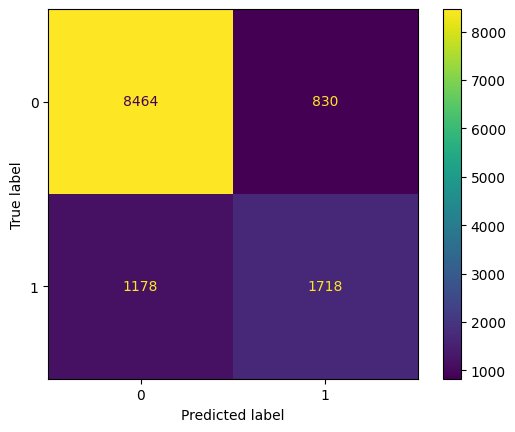

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [198]:
# Evaluate
knn_train_scores= eval_classification(y_train, knn_train_pred, name= 'KNN BaseTrain')

knn_test_scores= eval_classification(y_test, knn_test_pred, name= 'KNN BaseTest')

scores= pd.concat([scores, knn_train_scores, knn_test_scores])
scores

##### Tuning Hyperparameters

- We will tune the Hyperparameters to see if we can create a more accurate model.

In [199]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [200]:
knn_params= {'kneighborsclassifier__n_neighbors': range(1,15),
             'kneighborsclassifier__weights': ['uniform', 'distance']}

In [201]:
# GridSearchCV
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [202]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform'}

In [203]:
best_knn= knn_gs.best_estimator_

best_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd2612020>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd260e860>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=14))])

In [204]:
knn_tuned_train_pred= best_knn.predict(X_train)

knn_tuned_test_pred= best_knn.predict(X_test)

##### Tuned Model

KNN Tuned Train 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27786
           1       0.77      0.59      0.67      8783

    accuracy                           0.86     36569
   macro avg       0.83      0.77      0.79     36569
weighted avg       0.85      0.86      0.85     36569



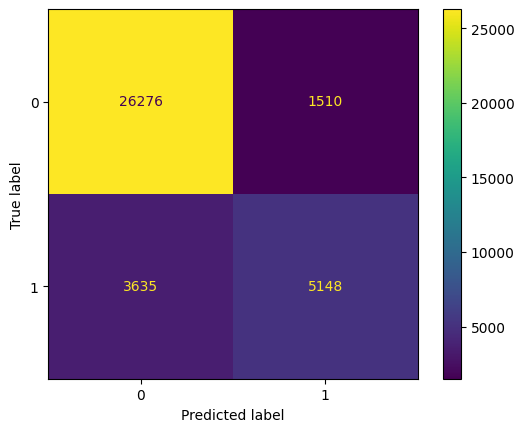

KNN Tuned Test 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9294
           1       0.73      0.56      0.63      2896

    accuracy                           0.85     12190
   macro avg       0.80      0.75      0.77     12190
weighted avg       0.84      0.85      0.84     12190



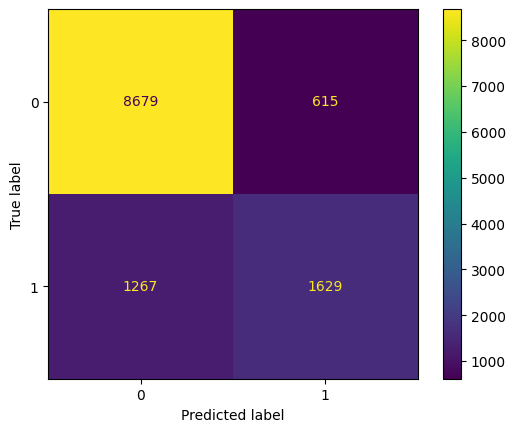

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [205]:
tuned_knn_train_scores= eval_classification(y_train, knn_tuned_train_pred, name= 'KNN Tuned Train')
tuned_knn_test_scores= eval_classification(y_test, knn_tuned_test_pred, name= 'KNN Tuned Test')

scores= pd.concat([scores, tuned_knn_train_scores, tuned_knn_test_scores])
scores

- Our Previous Models tested well, but were also very inbalanced.
- We will try the models below to try to make our model accurate and more balance
  - Over Sample
  - Under Sample
  - PCA

#### KNN Model w/ OverSampling

In [206]:
knn_over= KNeighborsClassifier()
knn_over_pipe= imblearn_pipe(base_processor, over_sampler, knn_over)
knn_over_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                ('randomoversampler', RandomOverSampler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [207]:
knn_over_train_pred= knn_over_pipe.predict(X_train)
knn_over_test_pred= knn_over_pipe.predict(X_test)

KNN OverSample Train 

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     27786
           1       0.64      0.93      0.76      8783

    accuracy                           0.86     36569
   macro avg       0.81      0.88      0.83     36569
weighted avg       0.89      0.86      0.86     36569



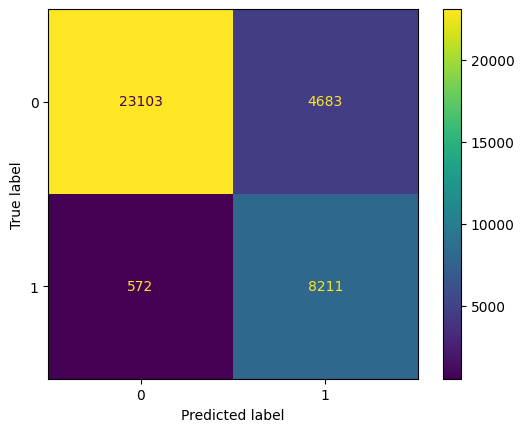

KNN OverSample Test 

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      9294
           1       0.52      0.79      0.63      2896

    accuracy                           0.78     12190
   macro avg       0.72      0.78      0.73     12190
weighted avg       0.83      0.78      0.79     12190



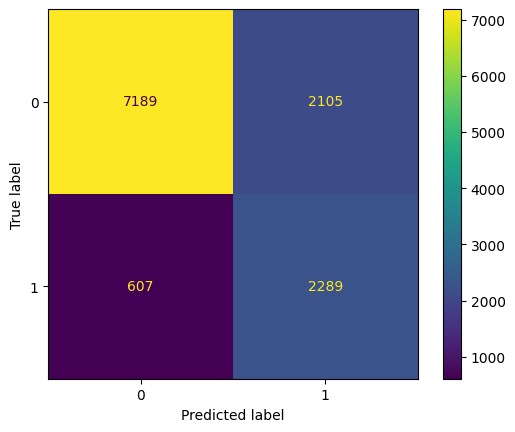

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [208]:
knn_over_train_scores= eval_classification(y_train, knn_over_train_pred, name= 'KNN OverSample Train')
knn_over_test_scores= eval_classification(y_test, knn_over_test_pred, name= 'KNN OverSample Test')

scores= pd.concat([scores, knn_over_train_scores, knn_over_test_scores])
scores

#### KNN Model w/ UnderSampling

In [209]:
knn_under = LogisticRegression()
knn_under_pipe = imblearn_pipe(base_processor, under_sampler, knn_under)
knn_under_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208e8f0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bd208d0f0>)])),
                ('randomundersampler', RandomUnderSampler()),
                ('logisticregression', LogisticRegression())])

In [210]:
knn_under_train_pred= knn_under_pipe.predict(X_train)
knn_under_test_pred= knn_under_pipe.predict(X_test)

KNN UnderSample Train 

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     27786
           1       0.57      0.84      0.68      8783

    accuracy                           0.81     36569
   macro avg       0.76      0.82      0.77     36569
weighted avg       0.85      0.81      0.82     36569



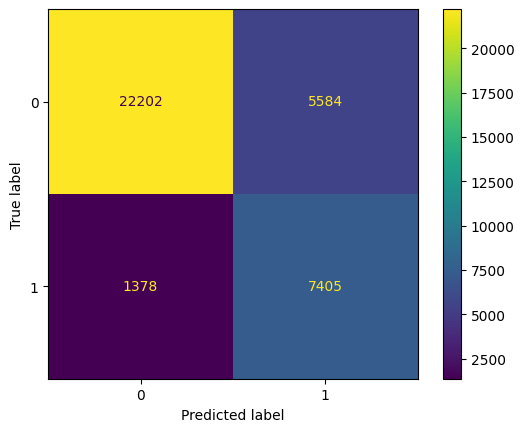

KNN UnderSample Test 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9294
           1       0.56      0.86      0.68      2896

    accuracy                           0.81     12190
   macro avg       0.75      0.82      0.77     12190
weighted avg       0.86      0.81      0.82     12190



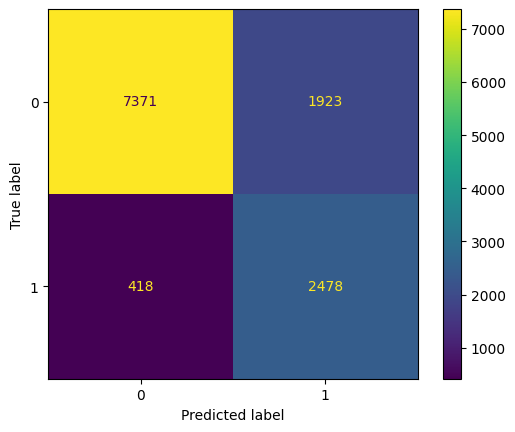

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [211]:
knn_under_train_scores= eval_classification(y_train, knn_under_train_pred, name= 'KNN UnderSample Train')
knn_under_test_scores= eval_classification(y_test, knn_under_test_pred, name= 'KNN UnderSample Test')

scores= pd.concat([scores, knn_under_train_scores, knn_under_test_scores])
scores

#### KNN Model w/ PCA

In [212]:
# Pipeline
pca_knn_pipe= make_pipeline(base_processor, PCA(n_components=.95), knn)

# Fit Model
pca_knn_pipe.fit(X_train, y_train)

# Predict
pca_knn_train_pred= pca_knn_pipe.predict(X_train)
pca_knn_test_pred= pca_knn_pipe.predict(X_test)

KNN PCA Train 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     27786
           1       0.79      0.68      0.73      8783

    accuracy                           0.88     36569
   macro avg       0.84      0.81      0.83     36569
weighted avg       0.88      0.88      0.88     36569



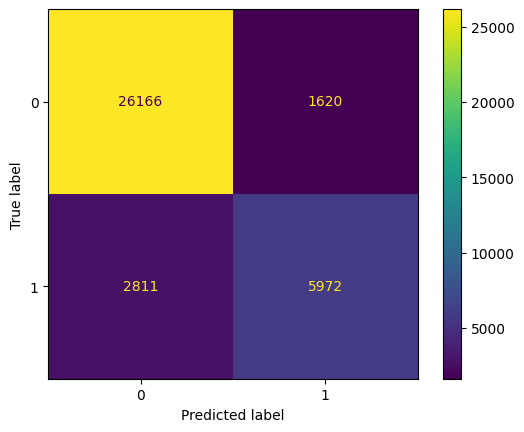

KNN PCA Test 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9294
           1       0.68      0.59      0.63      2896

    accuracy                           0.84     12190
   macro avg       0.78      0.75      0.76     12190
weighted avg       0.83      0.84      0.83     12190



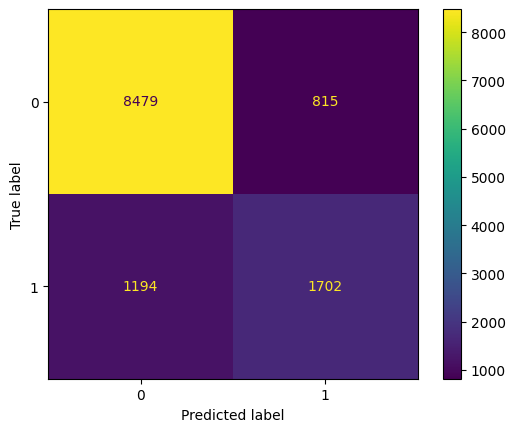

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


In [213]:
# Evaluate
pca_knn_train_scores= eval_classification(y_train, pca_knn_train_pred, name= 'KNN PCA Train')

pca_knn_test_scores= eval_classification(y_test, pca_knn_test_pred, name= 'KNN PCA Test')

scores= pd.concat([scores, pca_knn_train_scores, pca_knn_test_scores])
scores

##### Observations

- Our Tuned Model was just a little bit more accurate then our Base Model.
  - 0.835275 is our base model accuracy score.
  - 0.845611 is our tuned model accuracy score.
- The OverSampled Model was our lowest scoring Model.
  - 0.777523 is our OverSampled accuracy score
- The UnderSampled Model was our overall best model.
  - 0.807957 is our UnderSampled accuracy score
  - other models scored higher, but this model was the most balanced.
- PCA Model
  - 0.835193 is our PCA model accuracy score.

### Comparing Models

In [214]:
scores

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


- Our best Logistic Regression Test Score was 85.3% compared to our best KNN Test Score of 84.5%.
- Both scores are very close, but our Logistic Regression Model scored just a hair better.

## Final Evaluation

In [215]:
scores

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
LR BaseTrain,0.737216,0.602414,0.663033,0.852936
LR BaseTest,0.732665,0.605663,0.663138,0.853815
LR Tuned Train,0.570111,0.844358,0.680648,0.809702
LR Tuned Test,0.561114,0.856008,0.677878,0.806727
LR OverSample Train,0.570911,0.843334,0.680884,0.810140
LR OverSample Test,0.563736,0.856699,0.680005,0.808450
LR UnderSample Train,0.571550,0.843106,0.681264,0.810523
LR UnderSample Test,0.561650,0.855663,0.678161,0.807055
LR PCA Train,0.732734,0.574974,0.644338,0.847548


After comparing the models, my recommendation is:
 - Logistic Regression Model w/ OverSampling



 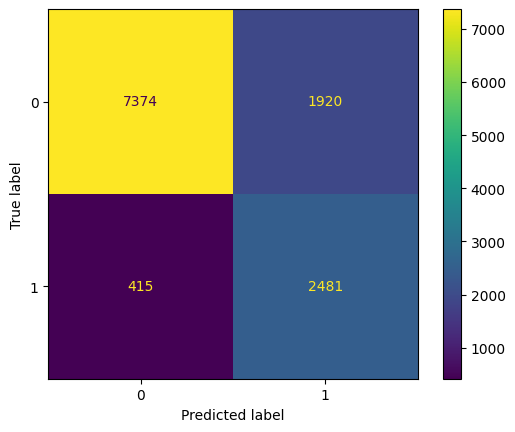


  - This model gave us an 81% chance of correctly predicting an individuals income.
  - We did have other models that scored higher than 81%
  - But this model was the most balanced.